# Amphi 9 - Support Vector Machines. Introduction to Kernel Method

# 1. Support Vector Machine for Binary Classification - Linear Separable Case

## 1.1. Remind: Logistic Regression

In Logistic Regression for binary classification, we suppose that the boundary is a hyperplan of form $\mathbf w \cdot \mathbf x + b = 0$ and try to find $\mathbf w$, $b$ minimizes:

$$
L(\mathbf w, b, \mathbf X, \mathbf y) = \sum_{n=1}^N l(\mathbf w, b, \mathbf x_n, y_n) 
$$

where $\mathbf X = (\mathbf x_1, \ldots, \mathbf x_N)$, $\mathbf y=(y_1, \ldots, y_N)$ denote the training set, and

$$
l(\mathbf w, b, \mathbf x, y) = y \log \left(\frac1{1 + \exp(-\mathbf w\cdot \mathbf x - b)}\right) + (1-y) \log \left(\frac1{1 + \exp(\mathbf w \cdot \mathbf x + b)}\right)
$$

Remind that when $\frac1{1 + \exp(-\mathbf w\cdot x - b)}$ is the probability that the output is 1 predicted by the logistic regression classifier, and $\frac1{1 + \exp(\mathbf w \cdot x + b)} = 1 - \frac1{1 + \exp(-\mathbf w\cdot x - b)}$ is the probability of output 0. The minus log logit function $-\log\left(\frac1{1+\exp(-z)}\right)$ is used as a "favorizer" of positivity of the argument $z$ because it will attain a value near 0 if $z >> 0$ and very large if $z << 0$, while $-\log\left( \frac1{1+\exp(z)}\right)$ is used as a "favorizer" of negativity of the argument.

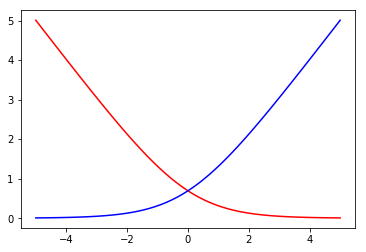

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt

def minusloglogit(z):
    return -np.log(1 / (1 + np.exp(-z)))

def minusloglogit0(z):
    return -np.log(1 / (1 + np.exp(z)))

X = np.linspace(-5, 5, 100)
plt.plot(X, minusloglogit(X), 'r')
plt.plot(X, minusloglogit0(X), 'b')

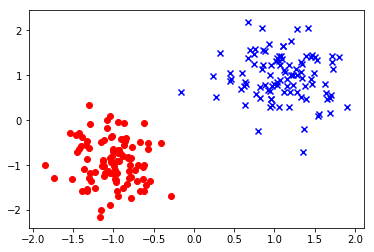

In [2]:
import pandas as pd

data = pd.read_csv("Example2.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')

[[2.76362881 1.98566284]]


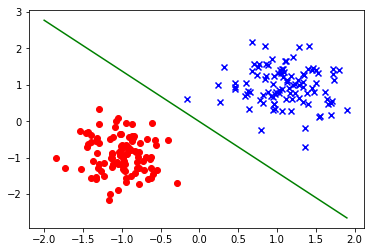

In [3]:
from sklearn.linear_model import LogisticRegression
X = data.values[:,:2]
y = data.values[:,2]

clf = LogisticRegression()
clf.fit(X, y)

plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
my_range = np.arange(-2, 2, 0.1)
w = clf.coef_
print(w)
b = clf.intercept_
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - b/w[0,1], 'g')

## 1.2 Margin

We are interested in the notion of "margin". Margin is distance between the nearest point to the boundary. In the first picture (logistic regression), the margin is large. In the second one, it is much smaller. In general, we usually prefer classifier possessing large margins. For example, if a new orange point appears that is near to the red cluster, we would rather classify it as a red point than a blue one. This is true if the margin is large in the first case and false in the other case. 

<img src="F1.png" width=600></img>

We would like to find a classifier that maximizes the sum of margins of 2 classes.

## 1.3 The Optimization Problem

If a hyperplan $\mathbf w \cdot \mathbf x + b = 0$ separates correctly two classes of the training set, the distance from $\mathbf x$ (in the training set) to this hyperplan is

$$
\frac{\vert \mathbf w \cdot \mathbf x + b\vert}{\Vert w \Vert} = \begin{cases}
\frac{\left( \mathbf w \cdot \mathbf x + b\right)}{\Vert w \Vert}, \qquad y = 1\\
-\frac{\left( \mathbf w \cdot \mathbf x + b\right)}{\Vert w \Vert}, \qquad y = 0
\end{cases}\\
= (2y-1)\frac{\left( \mathbf w \cdot \mathbf x + b\right)}{\Vert w \Vert}
$$

Denote $2y_n - 1 =: \tilde y_n$ for short (which is $\pm 1$)

So the maximum margin solution is found by solving
$$
\arg\max_{\mathbf w, b} \left( \frac1{\Vert \mathbf w\Vert} \min_n \tilde y_n(\mathbf w \cdot \mathbf x_n + b)\right)
$$

where $\min_n$ denotes minimum on the training set.

This problem is complex to solve. Note that the hyperplan doesn't change if we scale $\mathbf w, b$ by a coefficient, we can set a constraint on $\mathbf w, b$ that $\Vert w \Vert$ equals the margin, i.e:

$$
\tilde y_n \mathbf w \cdot \mathbf x_n + b = 1
$$

for closest point to the hyperplan. Now all data points in the training set will satisfy:

$$
\tilde y_n (\mathbf w \cdot \mathbf x_n + b) \geq 1,\qquad n = 1, \ldots N
$$

The maximization problem now becomes:

$$
\arg\max_{\mathbf w, b} \frac1{\Vert \mathbf w\Vert}
$$

where $$\tilde y_n (\mathbf w \cdot \mathbf x_n + b) \geq 1,\qquad n = 1, \ldots N $$ and the equality holds for at least one data point. We see that the requirement that equality holds will always automatically satisfy (otherwise a smaller $\Vert \mathbf w \Vert$ still satisfies all the constraints), hence we ignore it from the optimization problem. Besides, maximizing $\frac1{\Vert \mathbf w \Vert}$ is equivalent to minimizing $\Vert \mathbf w \Vert^2$. The problem becomes:

$$
\arg\min_{\mathbf w, b} \frac12 \Vert \mathbf w \Vert^2
$$

subject to
$$
\tilde y_n (\mathbf w \cdot \mathbf x_n + b) \geq 1,\qquad n = 1, \ldots N
$$

(coefficient $\frac12$ will be convenient for later uses).

## 1.4 Lagrange Method and The Dual Representation

By Lagrange method, we can introduce Lagrange multipliers $a_n \geq 0$

$$
L(\mathbf w, b, \mathbf a) = \frac12 \Vert \mathbf w \Vert^2 - \sum_{n=1}^N a_n \left( \tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1 \right)
$$

Setting the derivatives of $L(\mathbf w, b, \mathbf a)$ w.r.t $\mathbf w, b$ equal to 0, we get:

$$
\mathbf w = \sum_{n=1}^N a_n \tilde y_n \mathbf x_n, 
$$

$$
\sum_{n=1}^N a_n \tilde y_n = 0
$$

We get
$$
\Vert \mathbf w \Vert^2 = \sum_{n=1}^N\sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m \mathbf x_n \cdot \mathbf x_m
$$

The dual representation of the maximum margin problem becomes:
$$
\arg\max_{\mathbf a}\tilde L (\mathbf a) = \arg\max_{a}\sum_{n=1}^N a_n - \frac12 \sum_{n=1}^N \sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m \mathbf x_n \cdot \mathbf x_m
$$
s.t.
$$
a_n \geq 0, \qquad n = 1, \ldots, N \\
\sum_{n=1}^N a_n \tilde y_n = 0
$$


## 1.5 Solution to the Dual Problem. Support Vectors. Prediction

Note that the solution of this satisfies the KKT conditions, which requires for each $n = 1, \ldots, N$:

$$
a_n \geq 0 \\
\tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1\geq 0 \\
a_n (\tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1) = 0
$$

The points satisfying $\tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1 = 0$ are the nearest points to the boundary and called **support vectors**. The points where $a_n = 0$ are not support vectors and have no role in later prediction. Indeed, prediction can be done by calculating

$$
\mathbf w \cdot \mathbf x + b = \sum_{n=1}^N a_n \tilde y_n \mathbf x_n \cdot \mathbf x + b = \sum_{m \in \mathcal S} a_n \tilde y_m \mathbf x_m \cdot \mathbf x + b
$$

where $\mathcal S$ denotes the set of indices of support vectors, and classification is based on sign of this quantity.

To determine $b$, use
$$
\tilde y_n \left( \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m \cdot \mathbf x_n + b \right) = 1
$$

for all $n \in \mathcal S$. Multiplying both side of these equations by $\tilde y_n^2$, we have

$$
 \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m \cdot \mathbf x_n + b  = \tilde y_n
$$



We finally find out:
$$
b = \frac1{|\mathcal S|} \sum_{n \in \mathcal S} \left( \tilde y_n - \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m \cdot \mathbf x_n \right)
$$

After solving the problem and find out $\mathbf w, b$, the hyperplan $\mathbf w \cdot \mathbf x + b = 0$ will be called the **decision boundary** while $\mathbf w \cdot \mathbf x + b = \pm 1$ will be called **margin boundaries**.

## 1.6 ERM Representation

Support vector machine for linear separable case is represented by the optimization problem:

$$
\arg\min_{\mathbf w, b} \Vert \mathbf w \Vert^2
$$

s.t
$$
\tilde y_n (\mathbf w \cdot \mathbf x_n + b) \geq 1
$$

This problem is equivalent to:
$$
\arg\min_{\mathbf w, b} E_{\infty} \left( \tilde y_n (\mathbf w \cdot \mathbf x_n + b) - 1 \right) + \lambda \Vert w\Vert^2
$$

where $E_{\infty}(z) = 0$ if $z \geq 0$ and $+\infty$ if $z < 0$.

As an ERM representation, SVM optimization problem can be expressed by

$$
\hat y = \mathbf w \cdot \mathbf x + b
$$

$$
l(y, \hat y) = E_{\infty}(y \hat y \geq 1)
$$

and regularization $\Vert \mathbf w \Vert^2$. 

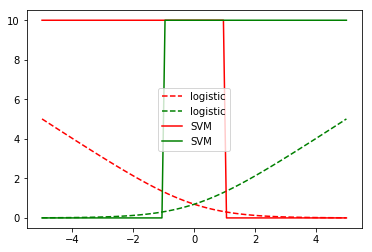

In [4]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, sys

INFINITY = 10

def infinityLoss(z):
    if z >= 1:
        return 0
    return INFINITY

def minusInfinityLoss(z):
    if z <= -1:
        return 0
    return INFINITY

myspace = np.linspace(-5, 5, 100)
plt.plot(myspace, minusloglogit(myspace), 'r--', label="logistic")
plt.plot(myspace, minusloglogit0(myspace), 'g--', label="logistic")
plt.plot(myspace, [infinityLoss(z) for z in myspace], 'r-', label="SVM")
plt.plot(myspace, [minusInfinityLoss(z) for z in myspace], 'g-', label="SVM")
plt.legend()

## 1.7 Implementation

** In case of linear separability, use large C for sklearn implementation **

In [5]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Boundary**

In [6]:
w = clf.coef_
w

array([[1.65488693, 1.85627221]])

In [7]:
b = clf.intercept_
b

array([0.1118497])

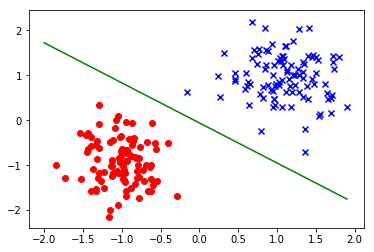

In [8]:
plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
my_range = np.arange(-2, 2, 0.1)
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - b/w[0,1], 'g')

**Support vectors**

In [9]:
clf.support_

array([  0, 116, 153])

In [10]:
clf.support_vectors_

array([[-0.6135, -0.0521],
       [-0.1585,  0.6198],
       [ 0.7992, -0.234 ]])

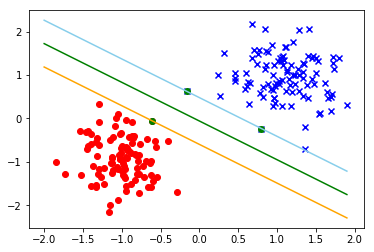

In [11]:
plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
my_range = np.arange(-2, 2, 0.1)
# Decision boundary wx + b = 0
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - b/w[0,1], 'g')
# Margin boundary wx + b = -1
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - (b + 1)/w[0,1], 'orange')
# Margin boundary wx + b = 1
plt.plot(np.arange(-2, 2, 0.1), -w[0,0]/w[0,1]*my_range - (b - 1)/w[0,1], 'skyblue')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], color='green', marker='o')

**Dual coefficients ($a_n$)**

In [12]:
clf.dual_coef_

array([[-3.09188504,  2.83284856,  0.25903648]])

# 2. Support Vector Machine for Binary Classification. Non Linear-Separable Case

## 2.1 The Optimization Problem

Using the same minimization problem as in the case of linear-separability, a mis-classified point will lead to infinity loss for ERM representation in 1.6. A not linearly separable dataset will give no solution to the constraint satisfaction problem (CSP) in 1.3. Hence, if we are dealing with data that are not linearly separable, we must modify the CSP (hence modify the loss function in ERM representation).

We will introduce the variables $\xi_n$, $n = 1, \ldots, N$ that modelize penalty for miss classified data points. If the data point is on the right side and inside the supported zone (i.e, has greater distance to the boundary than the support vectors), we will have $\xi_n  = 0$, otherwise $\xi_n$ will be proportional to the distance to the margin boundary of the correct side. $\xi_n$ are called slack variables. The linear-separable case is also called **soft margin** case.

We would prefer $\xi_n$ not too large, so we want $\sum_{n=1}^N \xi_n$ to be small. The problem now becomes:

$$
\arg\min_{\mathbf w, b} \frac12 \Vert w\Vert^2 + C\sum_{n=1}^N \xi_n
$$

s.t.

$$
\xi_n \geq 0, \qquad n = 1, \ldots, N \\
\tilde y_n (\mathbf w \cdot \mathbf x + b) \geq 1 - \xi_n
$$

where $C>0$ is a penalization coefficient that controls the trade-off between the slack variables and the margin.

## 2.2 The Dual Representation

Similarly to the linearly-separable case, we can introduce the Lagrangian

$$
L(\mathbf w, b, \mathbf a, \mathbf \mu) = \frac12 \Vert w\Vert^2 + C\sum_{n=1}^N \xi_n - \sum_{n=1}^N a_n(\tilde y_n (\mathbf w \cdot \mathbf x + b) - 1 + \xi_n) - \sum_{n=1}^N \mu_n \xi_n
$$.

The KKT conditions become:
$$
a_n \geq 0
\tilde y_n (\mathbf w \cdot \mathbf x + b) - 1 + \xi_n \geq 0
a_n(\tilde y_n (\mathbf w \cdot \mathbf x + b) - 1 + \xi_n) = 0
\mu_n \geq 0
\xi_n \geq 0
\mu_n \xi_n = 0
$$

where $n = 1, \ldots, N$.

Let $\partial L/\partial \mathbf w, \partial L/\partial b, \partial L/\partial \xi_n = 0 $ we have

$$
\mathbf w = \sum_{n=1}^N a_n \tilde y_n \mathbf x_n\\
\sum_{n=1}^N a_n \tilde Y_n = 0 \\
a_n = C - \mu_n
$$

The dual representation becomes:

$$
\arg\max_{\mathbf a, \mathbf \mu} \sum_{n=1}^N a_n - \frac12 \sum_{n=1}^N \sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m \mathbf x_n \cdot \mathbf x_m
$$

s.t.
$$
a_n \geq 0 \\
\mu_n \geq 0 \\
\sum_{n=1}^N a_n \tilde y_n = 0 
$$

Using $a_n = C - \mu_n$, we get the dual representation depending only on $\mathbf a$:

$$
\arg\max_{\mathbf a} \sum_{n=1}^N a_n - \frac12 \sum_{n=1}^N \sum_{m=1}^N a_n a_m \tilde y_n \tilde y_m \mathbf x_n \cdot \mathbf x_m
$$

s.t.
$$
0 \leq a_n \leq C \\
\mu_n \geq 0 \\
$$

The conditions $0 \leq a_n \leq C$ are called the box constraints. This is a quadratic programming problem.

## 2.3 Solution. Prediction

- Points corresponding to $a_n = 0$ can be discarded, they have no role to the prediction.
- Points corresponding to $a_n = C$ can have $\xi_n > 0$. They can lie inside the margin and can either be correctly classified if $\xi_n \leq 1$ or mis-classified if $\xi_n > 1$.
- Points corresponding to $0 < a_n < C$ have $\xi_n = 0$, they belong to $\tilde y_n(\mathbf w \cdot \mathbf x_n + b) = 1$ (the margin).

<img src="F2.png"></img>

Let $\mathcal S$ be the set of indices of points corresponding to $a_n \geq 0$ (type 2, 3). They are called support vectors.

Let $\mathcal M$ be the set of indices of points corresponding to $0 < a_n < C$ (type 3). They lie on the margins.

$b$ can be calculated using
$$
\mathbf w \cdot \mathbf x_n + b = \tilde y_n, \qquad n \in \mathcal M
$$

$$
\Leftrightarrow y\mathbf \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m\cdot \mathbf x_n + b = \tilde y_n, \qquad n \in \mathcal M
$$

Sum up to give
$$
b = \frac1{|\mathcal M|}\sum_{n \in \mathcal M} \left( \tilde y_n - \sum_{m \in \mathcal S} a_m \tilde y_m \mathbf x_m \cdot \mathbf x_n \right)
$$


**Prediction** can be done by calculating

$$
\mathbf w \cdot \mathbf x + b = \sum_{n=1}^N a_n \tilde y_n \mathbf x_n \cdot \mathbf x + b = \sum_{m \in \mathcal S} a_n \tilde y_m \mathbf x_m \cdot \mathbf x + b
$$

and classification is made using this quantity's sign.

## 2.4 ERM Representation

Recall the CSP representation of the problem:

$$
\arg\min_{\mathbf w, b} \frac12 \Vert w\Vert^2 + C\sum_{n=1}^N \xi_n
$$

s.t.

$$
\xi_n \geq 0, \qquad n = 1, \ldots, N \\
\tilde y_n (\mathbf w \cdot \mathbf x + b) \geq 1 - \xi_n
$$

The problem can be represented as

$$
\arg\min_{\mathbf w, b} \frac1{2C} \Vert w\Vert^2 + \sum_{n=1}^N \left[1 - \tilde y_n(\mathbf w \cdot \mathbf x + b) \right]_+
$$

As an ERM representation, SVM optimization problem can be expressed by

$$
\hat y = \mathbf w \cdot \mathbf x + b
$$

$$
l(y, \hat y) = E_{SV} (y\hat y) = \left[1 - y\hat y \right]_+
$$

and regularization $\Vert \mathbf w \Vert^2$, where $a_+$ denotes the positive part of $a$. $E_{SV}$ is called the **hinge** error function.

To compare with Logistic Regression.

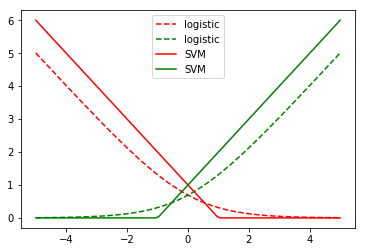

In [14]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, sys

INFINITY = 10

def HingeLoss(z):
    return ((1 - z) + abs(1 - z)) / 2

def HingeLossMinus(z):
    return ((1 + z) + abs(1 + z)) / 2    

myspace = np.linspace(-5, 5, 100)
plt.plot(myspace, minusloglogit(myspace), 'r--', label="logistic")
plt.plot(myspace, minusloglogit0(myspace), 'g--', label="logistic")
plt.plot(myspace, [HingeLoss(z) for z in myspace], 'r-', label="SVM")
plt.plot(myspace, [HingeLossMinus(z) for z in myspace], 'g-', label="SVM")
plt.legend()

## 2.5 Implementation

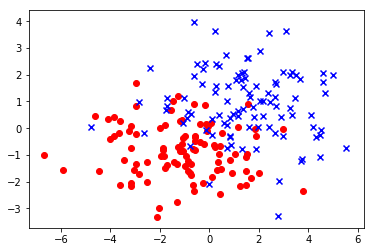

In [45]:
data = pd.read_csv("Example1.txt", sep=";", header=None)
red_data = data[data[2] == 0]
blue_data = data[data[2] == 1]

plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')

X = data.values[:,:2]
y = data.values[:,2]

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
w = clf.coef_
w

array([[0.5194304 , 1.02593164]])

In [48]:
b = clf.intercept_
b

array([-0.20002904])

In [49]:
clf.support_

array([  0,   1,  15,  16,  17,  18,  20,  21,  22,  25,  26,  29,  31,
        32,  33,  35,  40,  43,  44,  51,  52,  55,  58,  59,  60,  65,
        67,  70,  72,  73,  75,  82,  86,  92,  96,  99, 100, 107, 110,
       111, 112, 115, 116, 118, 124, 125, 128, 130, 131, 139, 141, 145,
       147, 153, 157, 158, 161, 165, 166, 172, 175, 176, 183, 184, 189,
       190, 191, 192, 193, 196, 197, 198])

In [50]:
y_pred = clf.predict(X)
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.])

In [51]:
np.array([i for i in range(len(X)) if y_pred[i] != y[i]])
# Should be a subset of support vectors

array([  0,   1,  15,  21,  33,  40,  52,  70,  73,  75, 100, 107, 110,
       115, 116, 118, 125, 130, 139, 141, 145, 153, 166, 172, 175, 183,
       184, 189, 191, 196, 198])

In [52]:
clf.decision_function(X)

array([ 1.53772801,  0.47617821, -2.29633056, -2.83132447, -4.06124059,
       -1.74790965, -3.39517212, -2.49745817, -2.93063795, -1.95013572,
       -2.04154003, -3.43219497, -1.01055419, -1.68308215, -2.70938442,
        0.03345135, -0.23281741, -0.67082176, -0.98362899, -3.70268763,
       -0.53029246,  0.42999986, -0.99973763, -2.5039206 , -1.34404744,
       -0.66292178, -0.99479446, -2.38888744, -1.75999987, -0.37073443,
       -1.88325732, -0.67408313, -0.84526404,  0.44406388, -1.3959584 ,
       -0.82246806, -1.3227039 , -3.97166017, -2.67079346, -1.21924389,
        1.31522999, -1.6917555 , -1.64995968, -0.78624153, -0.33062044,
       -1.96688394, -1.4443731 , -2.21304322, -2.48888593, -4.2664121 ,
       -2.00722918, -0.41430772,  0.73103757, -1.79798438, -2.27343442,
       -0.43733609, -1.5501279 , -2.73682815, -0.9165661 , -0.0245055 ,
       -0.76973515, -1.76670486, -1.94928495, -1.77202989, -3.59490234,
       -0.12990927, -4.17351346, -0.53505659, -1.96913542, -1.56

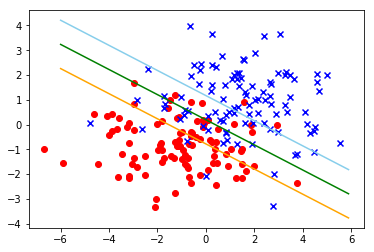

In [37]:
plt.scatter(red_data[0], red_data[1], color='red', marker='o')
plt.scatter(blue_data[0], blue_data[1], color='blue', marker='x')
my_range = np.arange(-6, 6, 0.1)
# Decision boundary wx + b = 0
plt.plot(my_range, -w[0,0]/w[0,1]*my_range - b/w[0,1], 'g')
# Margin boundary wx + b = -1
plt.plot(my_range, -w[0,0]/w[0,1]*my_range - (b + 1)/w[0,1], 'orange')
# Margin boundary wx + b = 1
plt.plot(my_range, -w[0,0]/w[0,1]*my_range - (b - 1)/w[0,1], 'skyblue')

# 3. Support Vector Machine for Multiclass Classification

# 4. Support Vector Machine for Regression



# 4. Kernel Methods